In [6]:
import pandas as pd
import statsmodels.api as sm

# Load the data from .dta file
file_path = 'CdV_6_MONTHS.ods'
df = pd.read_excel('CdV_6_MONTHS.ods', engine='odf', sheet_name='Sheet1')

# New columns:
df['average_ticket'] = df['wallet_equity'] / df['client_count']

# Define the dependent variable and the independent variables
y_subset = ['cap_value']
x_subset = ['done_meetings', 'is_male', 'client_count', 'wallet_equity', 'average_ticket']

# Create a list of all columns to check for NaNs
subset_check = y_subset + x_subset

# Drop rows where any of the specified columns have NaN values
df_filtered = df.dropna(subset=subset_check)

# Redefine y and X with the filtered data
y_filtered = df_filtered[y_subset]
X_filtered = df_filtered[x_subset]

# Add a constant to the predictors for the intercept
X_filtered = sm.add_constant(X_filtered)

# Fit the linear regression model
model = sm.OLS(y_filtered, X_filtered).fit()

# Display a summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              cap_value   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     2.108
Date:                Wed, 10 Jul 2024   Prob (F-statistic):             0.0716
Time:                        20:24:21   Log-Likelihood:                -1507.0
No. Observations:                  96   AIC:                             3026.
Df Residuals:                      90   BIC:                             3041.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2.475e+06   1.59e+06     -1.

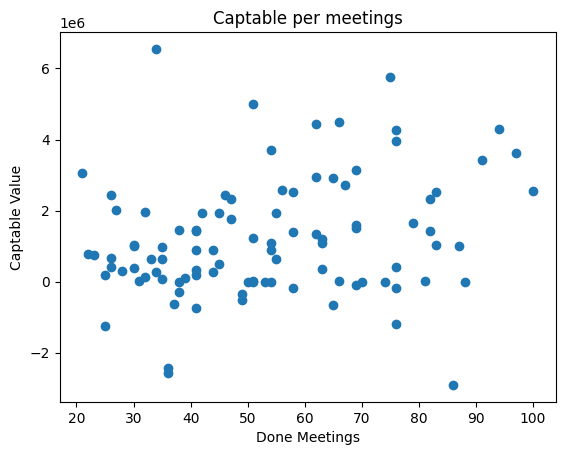

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from .dta file
file_path = 'CdV_6_MONTHS.ods'
df = pd.read_excel('CdV_6_MONTHS.ods', engine='odf', sheet_name='Sheet1')

# Assuming the ODS file has columns named 'x' and 'y'
# Create a scatter plot
plt.scatter(df['done_meetings'], df['cap_value'])

# Add title and labels
plt.title('Captable per meetings')
plt.xlabel('Done Meetings')
plt.ylabel('Captable Value')

# Show plot
plt.show()
